<a href="https://colab.research.google.com/github/eunhobang/ICT-AI-education/blob/main/8_12_%EB%AA%A8%EB%91%90%EC%9D%98_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

당뇨병여부 판단하는 모델별 정확도 비교
- 모델이 상용화가 되려면 85% 이상은 되어야 한다.
- 데이터별로 모델마다 정확도가 다르기 때문에 모델별로 다 이용하여 정확도 비교해 봐야 한다.

In [87]:
# cross_val_score: 교차 검증, overfitting 해결하는 것
# ㄴ 고정된 일부분을 테스트 데이터로 두지 않고 데이터의 모든 부분을 사용하여, 즉 교차 검증하여 모델의 성능을 검증
# StratifiedKFold:  매개변수로 n_splits, shuffle, random_state를 가진, 일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용
# ㄴ target에 속성값의 개수를 동일하게 하게 가져감으로써 kfold 같이 데이터가 한곳으로 몰리는것을 방지

"""
crosss_val_score()
사이킷 런에서는 교차검증(K-Fold or StratifiedKFold) 를 더 쉽게 할 수 있는 API를 제공하는 데 그것은 cross_val_score 이다.
"""
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler #평균 0 , 분산 1로 조정

import pandas as pd
import matplotlib.pyplot as plt


In [95]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [88]:
# DataSet

df = pd.read_csv("diabetes.csv")

In [99]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1 - 당뇨병 환자
0 - 일반인

In [96]:
# 세부 정보를 X로 지정,  당뇨병 여부를 y로 지정

X = df.iloc[: , 0:8] # 인덱스 0~8컬럼까지만
y = df.iloc[:, 8] # 인덱스 8컬럼만

In [ ]:
X

In [ ]:
y

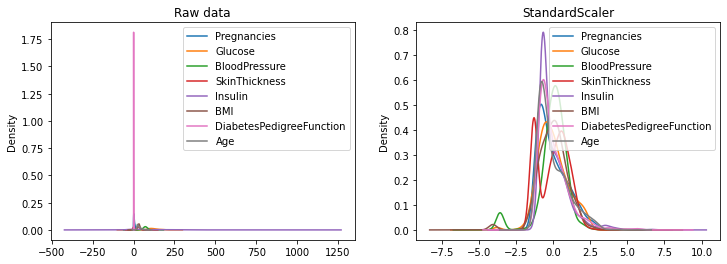

In [103]:
ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns = X.columns)

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
X.plot(kind = 'kde', title = 'Raw data', ax = ax[0])
scaled_X.plot(kind = 'kde', title = 'StandardScaler', ax = ax[1])
# Kernel Density Estimation
# 커널함수(kernel function)에 대한 이해가 필요한데 수학적으로 커널함수는 
# 원점을 중심으로 대칭이면서 적분값이 1인 non-negative 함수로 정의되며 
# 가우시언(Gaussian), uniform 함수 등이 대표적인 커널 함수

plt.show()


# rawdata -> 정규분포
# density : 밀도

In [109]:
# 학습셋과 테스트셋을 75:25의 비율로 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) # 

# random_state: random_state 인자는 수행시마다 동일한 결과를 얻기 위해 적용
# ㄴ 사용이유: 정해진 결과를 도출하기 위해서
"""
1이라는 값을 넣어서 1,3,47,5...번째 데이터를 이용했다면 또다시 1을 넣으면 1,3,47,5...번째 데이터를 사용하게 되는거죠. 
"""

In [ ]:
y_train

In [ ]:
y_test

## 결정 트리(Decision Tree)
- '예/아니오'라는 답이 나오는 질문을 계속해서 물으며 학습
- 예시) 육지에 사나요? 깃털이 있나요? 아가미 호흡을 하나요?


In [116]:
# 결정 트리 분류기 호출
from sklearn.tree import DecisionTreeClassifier

# 학습 환경 설정
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train) # fit: 훈련하라

# 테스트셋에 적용
y_pred = classifier.predict(X_test) # predict:예측

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정 , # n_splits: 데이터 분할 수, shuffle:데이터 섞을지 말지(True가 기본)
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산 # estimator=평가모델 # cv=fold수
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# print("accuracies: ", accuracies)
# print("accuracies.mean(): ", accuracies.mean())
# print("accuracies*100: ", accuracies*100)

"""
accuracies = [0.65517241 0.62068966 0.68965517 0.72413793 0.62068966 0.70689655, 0.57894737 0.68421053 0.75438596 0.66666667] :: 10개 나옴(안에 값은 코드 실행시 갱신)
그래서 meam()으로 평균을 구하는 것
"""

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차


Accuracy: 67.51 %
Standard Deviation: 7.60 %


## 랜덤 포레스트(Random Forest)
- 결정 트리를 여러 개 묶어 놓은 것
- 많은 결정 트리를 수행해 그로부터 나오는 분류 결과를 취합하여 최종 예측
- 너무 단순한 원리로 과적합(overfitting)에 빠지기 쉬운 결정 트리의 단점 보완

- aggregating : 집계
- 제일 많이 선택된 걸로 투표해서 선택

In [121]:
# 결정 트리 분류기 호출
from sklearn.ensemble import RandomForestClassifier

# 학습 환경 설정
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차

Accuracy: 73.29 %
Standard Deviation: 4.98 %


## 가우시안 나이브 베이즈(Gaussian Naive Bayes)
- 속성이 연속형 변수일 때 베이즈 정리를 기반으로 각 범주에 속할 확률 계산
- 예시) 테니스를 좋아하는 한 사람이 있다고 하자. 만약, 이 사람이 1. 날씨가 좋고 2. 습도가 낮은 날에 테니스를 칠 확률은 얼마나 되는가? 
- https://www.youtube.com/watch?v=3JWLIV3NaoQ



In [122]:
# 결정 트리 분류기 호출
from sklearn.naive_bayes import GaussianNB

# 학습 환경 설정
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차

Accuracy: 74.32 %
Standard Deviation: 7.12 %


## K-최근접 이웃(k-nearest neighood)
- 새로운 데이터가 입력되면 가장 가까이 있는 것을 중심으로 새로운 데이터 종류를 정해 주는 것
- 예) 새로운 데이터가 입력되었을 때 이 데이터가 붉은 원인지 푸른 원인지를 옟ㄱ
- 주변 데이터의 수를 k라 하고, k=3일 때 원이 붉은 원인지 푸른 원인지 판다
- 경우에 따라 k의 값을 조절해가며 결정


In [123]:
# 결정 트리 분류기 호출
from sklearn.neighbors import KNeighborsClassifier

# 학습 환경 설정
classifier = KNeighborsClassifier() # n_neighbors=3 -> 정확도 더 떨어짐
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차

Accuracy: 70.48 %
Standard Deviation: 3.20 %


## 에이다 부스트
- 여러 번의 분류를 통해 정답을 애측해 가는 알고리즘

In [124]:
from sklearn.ensemble import AdaBoostClassifier

# 학습 환경 설정
classifier = AdaBoostClassifier() 
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차

Accuracy: 72.22 %
Standard Deviation: 6.13 %


## 이차 판별 분석(Quadratic Discriminant Analysis)
- 각 클래스 분포의 중심과 모양을 결정
- 이들 클래스 사이의 경계를 그린 후 경계가 직선이면 선형 판별을, 곡선이면 2차 방정식의 판별을 분석함
- 각 클래스 간의 경계를 결정해 분류하는 방법

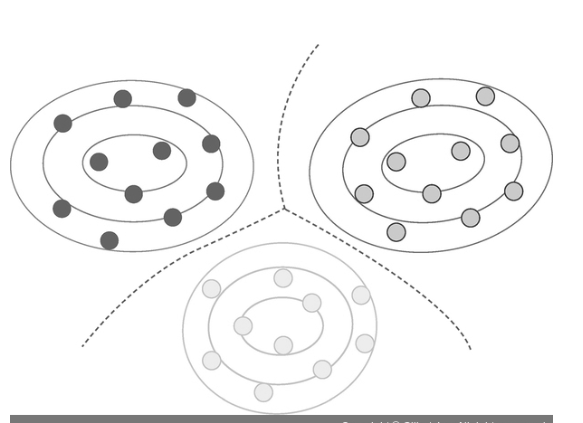
파란 점, 빨간 점, 노란 점이 다음 그림과 같이 위치해 있을 때, 각 클래스 분포의 중심과 모양을 결정합니다. 그리고 이들 클래스 사이의 경계를 그려 냅니다. 경계가 직선이면 선형 판별 분석, 2차 방정식에 의한 곡선이면 이차 판별 분석이 됩니다.

In [125]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 학습 환경 설정
classifier = AdaBoostClassifier() 
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차

Accuracy: 74.13 %
Standard Deviation: 6.43 %


## 서포트 벡터 머신(Support Vector machine)
- 분류를 위한 기준선을 정의하는 모델
- 경계선을 만들고 고오간의 마진이 최대화 되는 경계를 찾아 분류
- https://hleecaster.com/ml-svm-concept/ (이해 안 되면 여기서 참고)

In [126]:
from sklearn.svm import SVC

# 학습 환경 설정
# classifier = SVC()  # Accuracy: 73.95 %
classifier = SVC(kernel = 'linear') # kernel = 'linear': 선형으로 동작 #  Accuracy: 75.00 %

classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차

Accuracy: 74.83 %
Standard Deviation: 3.61 %


## 서포트 벡터 머신  - RBF 커널
- 주어진 데이터가 선형으로 분리될 수 없는 경우 사용
- 3차원 공간을 이용
- 커널이란 주어진 데이터를 고차원의 공간으로 새롭게 위치시키는 방법
- RBF(방사형)커널
- https://thebook.io/080324/partxt2/01/10/

In [127]:
from sklearn.svm import SVC

# 학습 환경 설정
# classifier = SVC()  # Accuracy: 73.95 %
classifier = SVC(kernel = 'rbf') 

classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차

Accuracy: 73.96 %
Standard Deviation: 4.70 %


## 보팅
- 여러가지 다른 유형의 알고리즘을 같은 데이터셋에 적용하여 학습
  - 여러가지 다른 유형 알고리즘 사용->앙상블
- 학습 결과를 모아 다수의 분류기가 결정한 결과를 선택하거나 클래스별 평균을 종합해 예측
- 단일 알고리즘의 단점을 보완


In [128]:
from sklearn.ensemble import VotingClassifier
# 여러가지 모델을 사용하니까 앙상블
# 앙상블이 모델뿐만아니라 데이터든 뭔든 여러가지 사용하면 앙상블이라고 함

# 학습 환경 설정
# Logistic Regression(lr), Random Forest(rf), Gaussian Naive Bayes(gnb)
# VotingClassifier(estimators = [('lr', clf1), ('rf', clf2), ('gnb', clf3)])
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')

classifier = VotingClassifier(estimators = [('lr', clf1), ('rf', clf2), ('gnb', clf3)])
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차


Accuracy: 73.77 %
Standard Deviation: 4.42 %


## 배깅
- 데이터 세트를 여러 개로 분리하여 분류하여 단일 알고리즘에 적용
- 부스팅과 다른 점은 각 분류기를 제가각 따로따로 분류한다는 점
- 단일 분류기를 여러 번 사용함으로써 정확도를 높이고 과적합을 방지하는 효과가 있음

In [129]:
# 배깅 분류기 호출
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10)
classifier.fit(X_train, y_train)

# 테스트셋에 적용
y_pred = classifier.predict(X_test)

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차


Accuracy: 74.64 %
Standard Deviation: 4.18 %


# 여러 알고리즘의 성능을 한눈에 비교하기

In [130]:
# 사용한 분류기(classifier)를 모두 지정
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel = 'linear'),
               SVC(kernel = 'rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                            ('2', RandomForestClassifier()),
                                            ('3', SVC(kernel = 'linear'))    
               ]),
              BaggingClassifier(base_estimator= clf3, n_estimators= 10, random_state = 0)
]


In [131]:
# 각 분류기 이름 저장
classifier_names = [
    'D_tree',
    'RF',
    'GNB',
    'KNN',
    'SVM_l',
    'SVM_k',
    'Ada',
    'QDA',
    'Voting',
    'Bagging'

]

In [132]:
# 결과가 저장될 리스트 만들기
modelaccuracies = []
modelmeans = []
modelnames = []


In [133]:
classifier_data = zip(classifier_names, classifiers)

for classifier_name, classfier in classifier_data:
  skf = StratifiedKFold(n_splits=10, shuffle=True)
  accuracies = cross_val_score(classifier, X=X_train, y=y_train, cv=skf)

  print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))

  # 결과 저장
  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)

Mean accuracy of D_tree : 74.68 %
Mean accuracy of RF : 73.97 %
Mean accuracy of GNB : 74.32 %
Mean accuracy of KNN : 73.28 %
Mean accuracy of SVM_l : 74.99 %
Mean accuracy of SVM_k : 74.31 %
Mean accuracy of Ada : 74.64 %
Mean accuracy of QDA : 74.31 %
Mean accuracy of Voting : 75.20 %
Mean accuracy of Bagging : 75.36 %


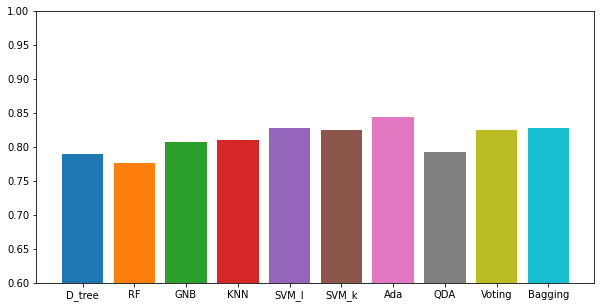

In [134]:
plt.figure(figsize=(10,5))
plt.ylim([0.6,1])
for name, accuracy  in zip(modelnames, modelaccuracies):
  plt.bar(name, accuracy )
  # plt.show()

<BarContainer object of 10 artists>

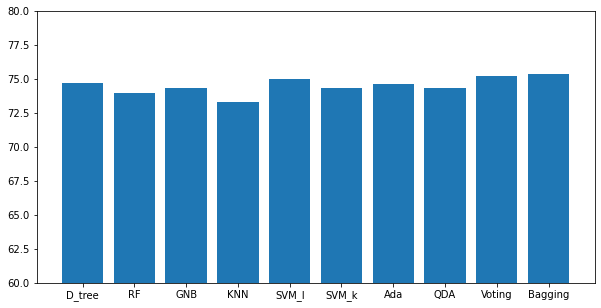

In [135]:
# 분류기별 정확도의 평균값을 막대 그래프로 출력
plt.figure(figsize=(10, 5))
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans)


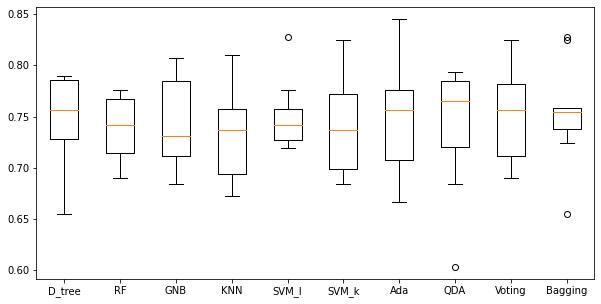

In [136]:
# 분류기별 결과를 박스 그래프로 출력
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)
# “111”은 “1×1 그리드, 첫 번째 서브 플롯”을 의미하고, “234”는 “2×3 그리드, 네 번째 서브 플롯”을 의미
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()


In [137]:
modelaccuracies


[array([0.75862069, 0.74137931, 0.68965517, 0.77586207, 0.72413793,
        0.65517241, 0.78947368, 0.78947368, 0.78947368, 0.75438596]),
 array([0.70689655, 0.74137931, 0.77586207, 0.70689655, 0.74137931,
        0.68965517, 0.73684211, 0.75438596, 0.77192982, 0.77192982]),
 array([0.72413793, 0.75862069, 0.72413793, 0.79310345, 0.68965517,
        0.70689655, 0.80701754, 0.68421053, 0.73684211, 0.80701754]),
 array([0.68965517, 0.70689655, 0.81034483, 0.75862069, 0.67241379,
        0.67241379, 0.71929825, 0.75438596, 0.75438596, 0.78947368]),
 array([0.75862069, 0.72413793, 0.74137931, 0.82758621, 0.77586207,
        0.74137931, 0.75438596, 0.73684211, 0.71929825, 0.71929825]),
 array([0.77586207, 0.75862069, 0.68965517, 0.81034483, 0.68965517,
        0.72413793, 0.68421053, 0.73684211, 0.73684211, 0.8245614 ]),
 array([0.77586207, 0.72413793, 0.67241379, 0.77586207, 0.75862069,
        0.84482759, 0.78947368, 0.66666667, 0.75438596, 0.70175439]),
 array([0.75862069, 0.75862069, 0.

In [138]:
modelmeans

[74.67634603750757,
 73.97156684815486,
 74.31639443436177,
 73.27888687235331,
 74.98790078644888,
 74.30732002419843,
 74.64004839685421,
 74.313369630974,
 75.20266182698124,
 75.356926799758]

# 수업 시간 외 학습 모델

## XBGoost
- 여러 개의 결정 트리 조합해서 학습하는 앙상블 모델

In [120]:
import xgboost as xgb

# 학습 환경 설정
# classifier = xgb.XGBClassifier()
classifier = xgb.XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=100)
# classifier.fit(X_train, y_train) # fit: 훈련하라
classifier.fit(X_train, y_train, verbose=False) # verbose는 학습마다 평가값들에 대한 메세지를 출력할지말지

# 테스트셋에 적용
y_pred = classifier.predict(X_test) # predict:예측

# 계층별(서브셋 n_splits=10) 교차 검증 환경 설정 , # n_splits: 데이터 분할 수, shuffle:데이터 섞을지 말지(True가 기본)
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산 # estimator=평가모델 # cv=fold수
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # 정확도
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) # 표준편차

Accuracy: 73.44 %
Standard Deviation: 6.40 %
